# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [7]:
y_Train_OneHot.shape

(60000, 10)

# 建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Dense

In [9]:
#建立模型

model = Sequential()
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=100, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [10]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 227,670
Trainable params: 227,670
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [11]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [12]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 35s 739us/step - loss: 0.2664 - accuracy: 0.9230 - val_loss: 0.1198 - val_accuracy: 0.9642
Epoch 2/10
48000/48000 [==============================] - 34s 714us/step - loss: 0.1013 - accuracy: 0.9686 - val_loss: 0.0981 - val_accuracy: 0.97005s - loss: 0.1 - E - ETA: 15s - lo - ETA: 13s - loss: 0.1 - ETA: 12s - loss: 0.1034 - accuracy: 0 - ETA:
Epoch 3/10
48000/48000 [==============================] - 33s 678us/step - loss: 0.0656 - accuracy: 0.9794 - val_loss: 0.0956 - val_accuracy: 0.9713
Epoch 4/10
48000/48000 [==============================] - 33s 686us/step - loss: 0.0491 - accuracy: 0.9840 - val_loss: 0.0881 - val_accuracy: 0.9744s: 0.0456 - - ETA: 20s - loss: 0.0457 -  - ETA: 19s - - ETA: 17s - loss: 0.0455 - accuracy: 0.9 - ETA: 17s - loss: 0.0454 - accuracy - ETA: 16s - loss: 0. - ETA: 15s - loss: - ETA: 13s - loss: 0.0463 - ETA: 12s - loss: 0.0470 - - ETA: 11s - loss - E -

# 以圖形顯示訓練過程

In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

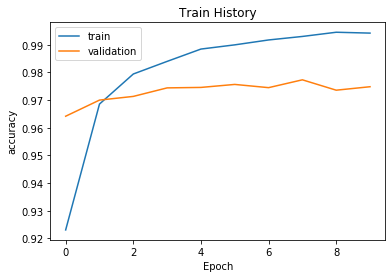

In [18]:
show_train_history(train_history,'accuracy','val_accuracy')

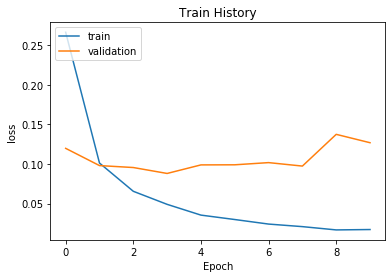

In [15]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [19]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 2s 215us/step

accuracy= 0.9765999913215637
